In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

leveldb = pd.read_csv('../stbench_eval_out/leveldb/stats.csv')
leveldb

,time,state,reads,updates,inserts,total,mem,disk,files
0,1,recover,0,0,39418,39418,0,0,0
1,2,recover,0,0,15767,15767,0,0,0
2,3,recover,0,0,10512,10512,0,38275379,15
3,4,recover,0,0,7886,7886,13721592,38275379,15
4,5,recover,0,0,6304,6304,12964944,72302797,23
...,...,...,...,...,...,...,...,...,...
155,156,running,1,0,0,2,78565632,2151552053,768
156,157,running,2,0,0,3,107939440,1075235916,517
157,158,running,3,0,0,4,107939440,1075235916,517
158,159,running,4,0,0,4,118958960,1075329566,517


In [43]:


states = {}

prevState = ""
for index, row in leveldb.iterrows():
    state = row['state']
    time = row['time']
    if state not in states:
        states[state] = []
    
    stateList = states[state]

    
    # state did not change, just change the end-time of the last item
    if prevState == state:
        stateList[-1][1] = time
    else:
        # state changed, create a new block
        stateList.append([time, time])
        
    prevState = state
    
    

1886.3999999999994


Text(0.5, 169.64687782805424, 'Disk & Files')

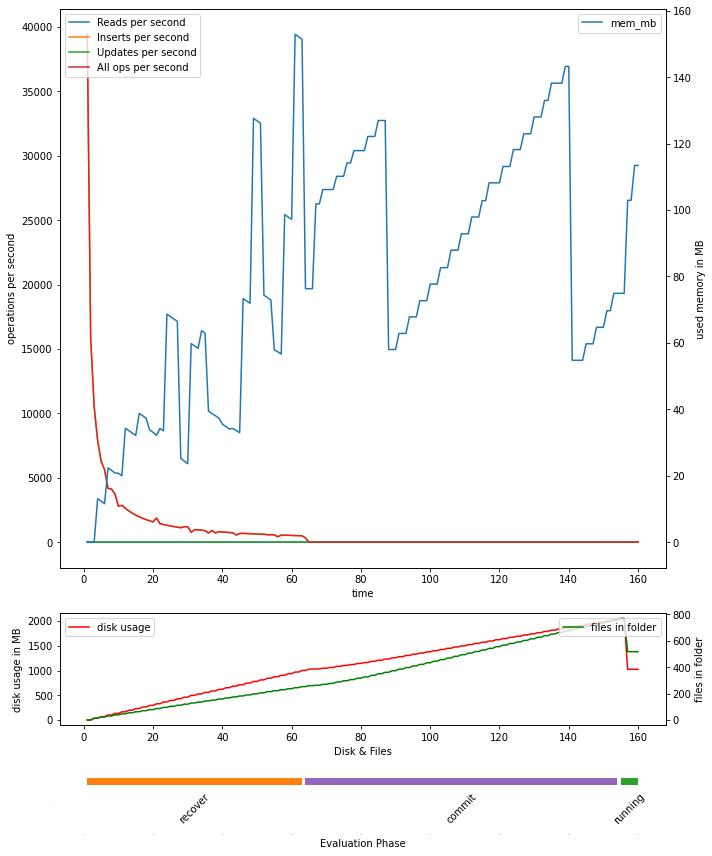

In [49]:
fig, (ax, diskAx, stateAx) = plt.subplots(3, figsize=(10,12),  gridspec_kw={'height_ratios': [20,4,2]})
memAx = ax.twinx()

leveldb['mem_mb'] = leveldb['mem'] / (1024*1024)

colors = {'open':'blue',
          'recover':'orange',
          'reopen':'olive',
          'running':'green',
          'commit':'purple',
          'close':'gray',
          'prepare-run':'orange',
          'iterate':'pink',
         }
         

stateList = [] 
colorList = [] 
stateLabelList = [] 

for state, stateSlots in states.items():
    for s in stateSlots:
        stateList.append([s[0], s[1]-s[0]])
        colorList.append("tab:"+colors.get(state, 'red'))
        stateLabelList.append(state)
       
    

ax.set_xlabel('time')
ax.set_ylabel('operations per second')
memAx.set_ylabel('used memory in MB')
opsMax = leveldb['total'].quantile(q=0.9)
leveldb.plot(x='time', y=['reads', 'inserts', 'updates', 'total'], ax=ax, label=["Reads per second","Inserts per second", "Updates per second", "All ops per second"])
leveldb.plot(x='time', y='mem_mb', ax=memAx)
ax.legend(loc='upper left')
memAx.legend(loc='upper right')

stateAx.set_ylim(0,16)
stateAx.set_xlabel('Evaluation Phase')
stateAx.set_yticks([7])
stateAx.tick_params('both', width=0,labelsize=0)
stateAx.broken_barh(stateList, [12,2], facecolors=colorList)

for pos in ['left', 'right', 'top', 'bottom']:
    stateAx.spines[pos].set_visible(False)

fig.tight_layout()

for i, state  in enumerate(stateList):
    stateAx.text(x=state[0] + state[1]/2.0, ha="center", y=1, rotation=45, s=stateLabelList[i])

fileAx = diskAx.twinx()


leveldb['disk_mb'] = leveldb['disk'] / (1024*1024)

leveldb.plot(x='time', y='files', ax=fileAx, color="green", label="files in folder")
leveldb.plot(x='time', y='disk_mb', ax=diskAx, color="red", label="disk usage")
fileAx.legend(loc='upper right')
fileAx.set_ylabel('files in folder')
diskAx.set_ylabel('disk usage in MB')
diskAx.legend(loc='upper left')
diskAx.set_xlabel("Disk & Files")
    